# <font color='darkred'>1. Introduction</font>

## 1.2 Overview of the Problem
Build a predictive model that would help identify customers who are most likely to open a bank account, and, based on that data, make a decision if the number of customers and projections make it worthwhile to open a bank branch.

## 1.3 Project Members
- David
- Duncan
- Karen

## 1.4 Approach Methodology



# <font color='darkred'>2. Data Preparation and Cleaning</font>

In [83]:
# loading basic libraries
import numpy as np
import pandas as pd

# loading visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to preview all columns
pd.set_option("display.max.columns", None)

%matplotlib inline

In [2]:
# loading and previewing our dataset
train = pd.read_csv('Train_v2.csv')
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [11]:
# checking the variable definitions of the data set
varDef = pd.read_csv('VariableDefinitions.csv')
varDef

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [5]:
# checking the shape of our data set
train.shape

## 23,524 rows, 13 columns

(23524, 13)

In [7]:
# checking the data set's basic info
train.info()

## the numbers 23524 indicate that there are no missing values in this data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [8]:
# dropping duplicates, if any
train = train.drop_duplicates()
train.shape

## no duplicates found so none were dropped

(23524, 13)

In [16]:
# previewing the unique values in each column
colnames = train.columns

for column in colnames:
    print("\n")
    print("Column name:", column)
    print(train[column].unique())
    print("Number of unique values:", train[column].nunique())



Column name: country
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
Number of unique values: 4


Column name: year
[2018 2016 2017]
Number of unique values: 3


Column name: uniqueid
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
Number of unique values: 8735


Column name: bank_account
['Yes' 'No']
Number of unique values: 2


Column name: location_type
['Rural' 'Urban']
Number of unique values: 2


Column name: cellphone_access
['Yes' 'No']
Number of unique values: 2


Column name: household_size
[ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
Number of unique values: 20


Column name: age_of_respondent
[ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97

In [18]:
# check for missing values
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

No missing values in this dataset.

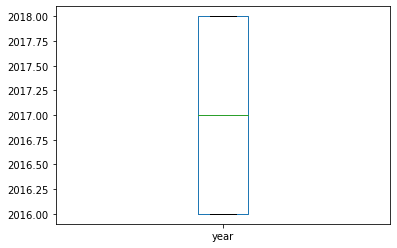

In [63]:
# checking for outliers in the "Year" column
train.year.plot(kind = 'box')

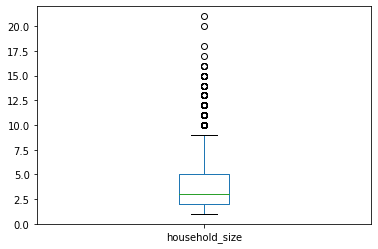

In [66]:
# checking for outliers in the "Household Size" column
train.household_size.plot(kind = 'box')

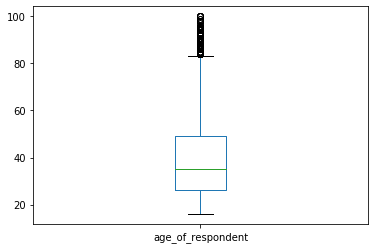

In [65]:
# checking for outliers in the "Age of Respondent" column
train.age_of_respondent.plot(kind = 'box')

From the above box diagrams, we see that Year does not have any outliers, Household_Size has some outliers and Age Of Respondent has a lot of outliers. We could remove them but it's best to leave them where they are as they could provide some useful insights.

In [70]:
# to remove the ourliers, uncomment the below lines
# NOTE: it will save to a new dataset called "dataset"

# q3 = train.quantile(0.75)
# q1 = train.quantile(0.25)
# iqr = q3 - q1

# print("IQR:", iqr)

# dataset = train[~((train < (q1 - 1.5 * iqr)) | 
#                  (train > (q3 + 1.5 * iqr))).any(axis = 1)]
# dataset.shape

# <font color='darkred'>3. Exploratory Data Analysis</font>

## 3.1 Univariate Analysis

In [19]:
# getting summary of the data set's descriptive statistics
train.describe(include = 'all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_931,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64


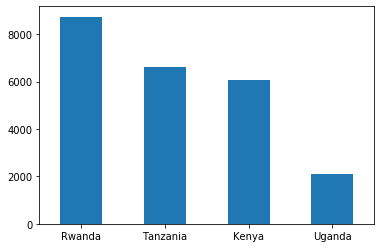

In [24]:
# countplot of countries
print(train.country.value_counts())
train.country.value_counts().plot(kind = 'bar', rot = 0)

Most frequenttly occurring country is Rwanda, followed by Tanzania, then Kenya, then finally Uganda.

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64


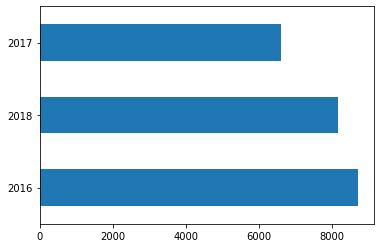

In [26]:
# countplot of year
train.year.value_counts().plot(kind = 'barh')
print(train.year.value_counts())

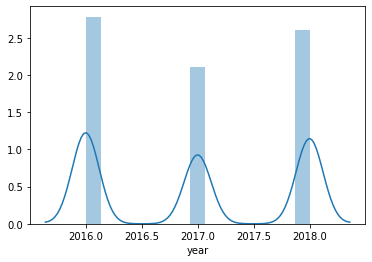

In [73]:
# distribution plot of year
sns.distplot(train.year)

Majority of the records are from 2016, followed by 2018, then finally 2017.

No     20212
Yes     3312
Name: bank_account, dtype: int64


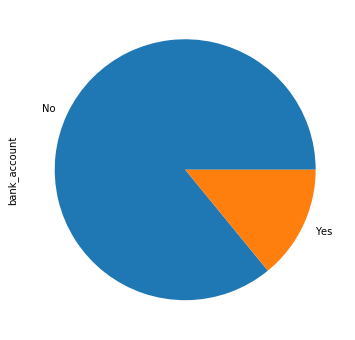

In [74]:
# distribution of bank account status
print(train.bank_account.value_counts())
train.bank_account.value_counts().plot(kind = 'pie', figsize = (6, 6))

More people reported not having an account than those who did.

Rural    14343
Urban     9181
Name: location_type, dtype: int64


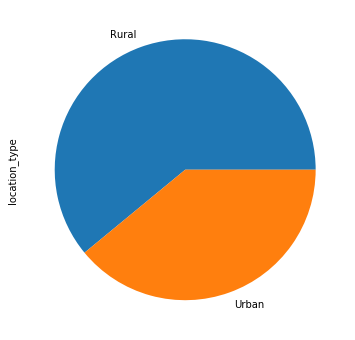

In [71]:
# distribution of location type
print(train.location_type.value_counts())
train.location_type.value_counts().plot(kind = 'pie', figsize = (6, 6))

Majority of the respondents resided in Rural areas compared to those in Urban areas.

Yes    17454
No      6070
Name: cellphone_access, dtype: int64


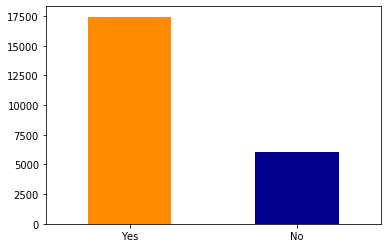

In [36]:
# Cell Phone Access distribution
print(train.cellphone_access.value_counts())
train.cellphone_access.value_counts().plot(kind = 'bar', rot = 0, color = ("darkorange", "darkblue"))

Majority of the respondents reported having cell phone access.

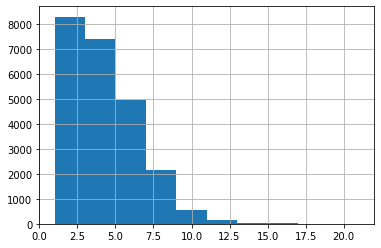

In [37]:
# histogram of household size
train.household_size.hist()

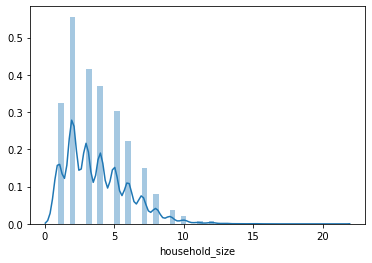

In [38]:
# distribution plot of household size
sns.distplot(train.household_size)

In [104]:
# getting the descriptive statistics of Household Size
print("Kurtosis of Household Size:", round(train.household_size.kurt(), 3))
print("Skewness of Household Size:", round(train.household_size.skew(), 3))
train.household_size.describe()

Kurtosis of Household Size: 1.313
Skewness of Household Size: 0.988


count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

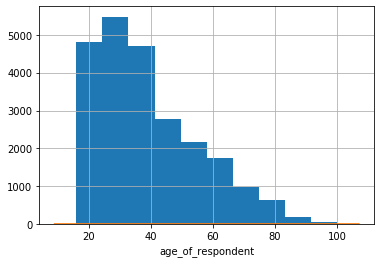

In [39]:
# histogram of age of respondents
train.age_of_respondent.hist()

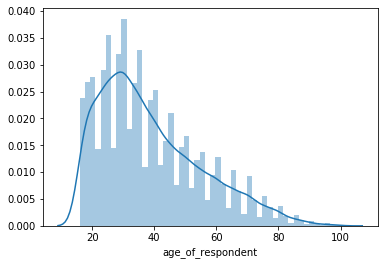

In [40]:
# distribution plot of age of respondents
sns.distplot(train.age_of_respondent)

In [105]:
# getting the descriptive statistics of Age of Respondent
print("Kurtosis of Age of Respondent:", round(train.age_of_respondent.kurt(), 3))
print("Skewness of Age of Respondent:", round(train.age_of_respondent.skew(), 3))
train.age_of_respondent.describe()

Kurtosis of Age of Respondent: 0.1
Skewness of Age of Respondent: 0.842


count    23524.000000
mean        38.805220
std         16.520569
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: age_of_respondent, dtype: float64

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64


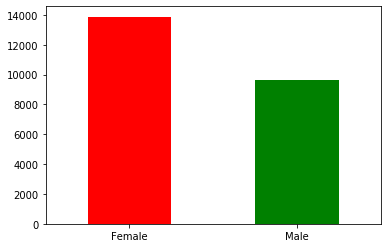

In [29]:
# females vs males
train.gender_of_respondent.value_counts().plot(kind = 'bar', rot = 0, color = ("red", "green"))
print(train.gender_of_respondent.value_counts())

This dataset is imbalanced as there are more females than males.

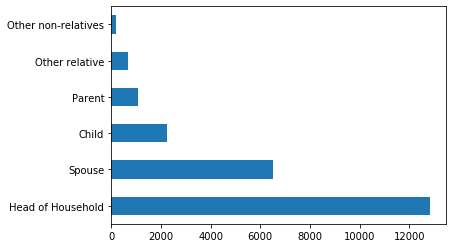

In [44]:
# barplot of relationship with head of household
train.relationship_with_head.value_counts().plot(kind = 'barh')

Majority of the respondents are Heads of their Households, followed by those who are Spouses, then Child, then Parent, then Other relative, and finally Other non-relatives.

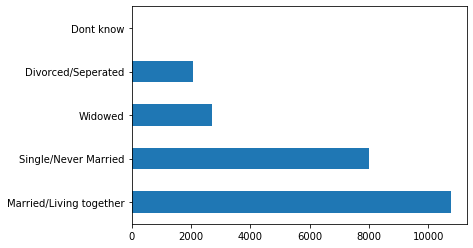

In [49]:
# barplot of marital status
train.marital_status.value_counts().plot(kind = 'barh')

Majority of the respondents are married or living together with their partners.

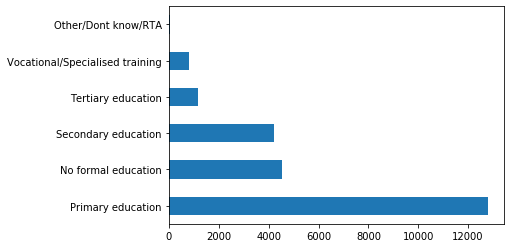

In [58]:
train.education_level.value_counts().plot(kind = 'barh')

Majority of the respondents in the data set had responded having completed at least Primary Education. They are then followed by those with No Formal Education and Secondary Education.

In [60]:
# frequency table of job types
train.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

Majority of the respondents are self employed, followed by those who are informally employed, followed by those in the Farming and Fishing sector. The minority either did not know their job type or refused to answer.

## 3.2 Bivariate Analysis

[Text(0, 0.5, 'bank account'), Text(0.5, 1.0, 'Bank Account By Country')]

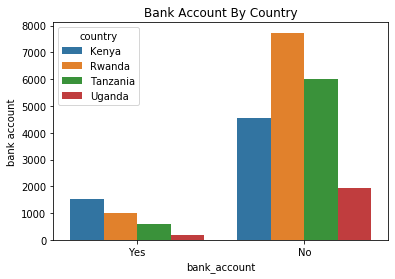

In [52]:
# investigating bank account by country
bank_cou = sns.countplot('bank_account', hue = 'country', data = train)
bank_cou.set(title = 'Bank Account By Country', ylabel = 'bank account')

Kenya reports the highest number of bank accounts with Uganda reporting the lowest.

[Text(0, 0.5, 'year'), Text(0.5, 1.0, 'Bank Account By Year')]

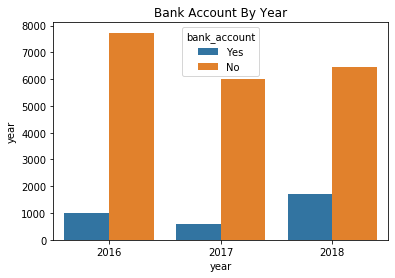

In [55]:
# investigating bank account by year
bank_yr = sns.countplot('year', hue = 'bank_account', data = train)
bank_yr.set(title = 'Bank Account By Year', ylabel = 'year')

2018 saw an increase in the number of bank accounts across East Africa.

[Text(0, 0.5, 'bank account'), Text(0.5, 1.0, 'Bank Account By Location Type')]

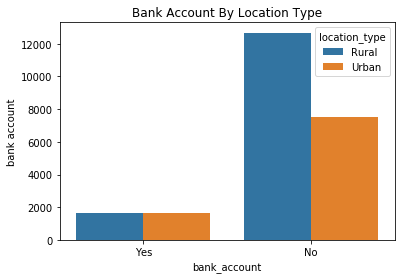

In [56]:
# investigating bank account by location type
bank_loc = sns.countplot('bank_account', hue = 'location_type', data = train)
bank_loc.set(title = 'Bank Account By Location Type', ylabel = 'bank account')

There appears to be no difference between the rural and the urban respondents on having a bank account, although the numbers are quite low.

[Text(0, 0.5, 'bank account'),
 Text(0.5, 1.0, 'Bank Account By Cell Phone Access')]

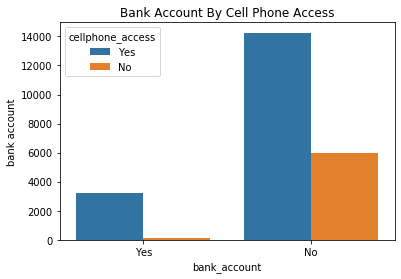

In [62]:
# investigating bank account by cell phone access
bank_cpa = sns.countplot('bank_account', hue = 'cellphone_access', data = train)
bank_cpa.set(title = 'Bank Account By Cell Phone Access', ylabel = 'bank account')

We see that, for both those with bank accounts and those without, the number of those with cell phone access is greater than that of those without.

[Text(0, 0.5, 'bank account'), Text(0.5, 1.0, 'Bank Account By Gender')]

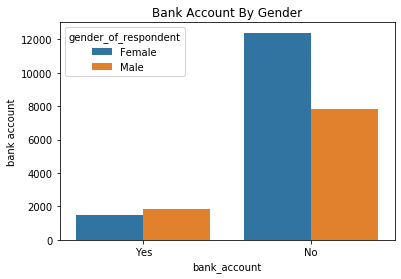

In [51]:
# investigating bank account by gender
bank_gen = sns.countplot('bank_account', hue = 'gender_of_respondent', data = train)
bank_gen.set(title = 'Bank Account By Gender', ylabel = 'bank account')

More males than females have a bank account.

[Text(0.5, 1.0, 'Bank Account By Relationship with the Head of the Household')]

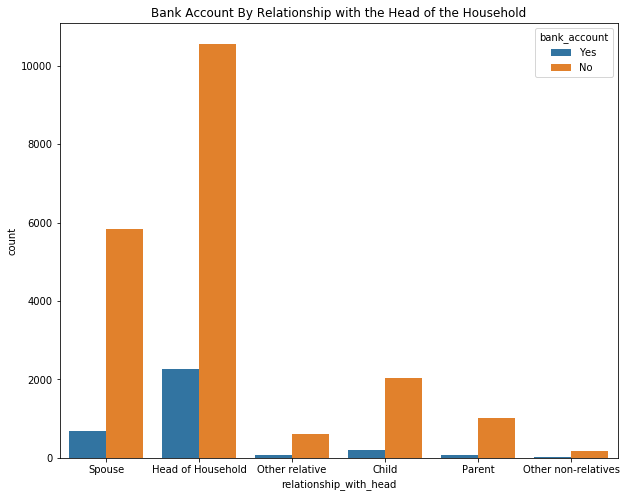

In [86]:
# investigating bank account by Relationship with Head of Household
fig, ax = plt.subplots(figsize = (10, 8))
bank_head = sns.countplot('relationship_with_head', hue = 'bank_account', data = train)
bank_head.set(title = 'Bank Account By Relationship with the Head of the Household')

Of those with bank accounts, the highest number consists of those who are Heads of their Household followed by those who are Spouses. Other non-relatives reported the least number of those with bank accounts.

[Text(0, 0.5, 'marital status'),
 Text(0.5, 1.0, 'Bank Account By Marital Status')]

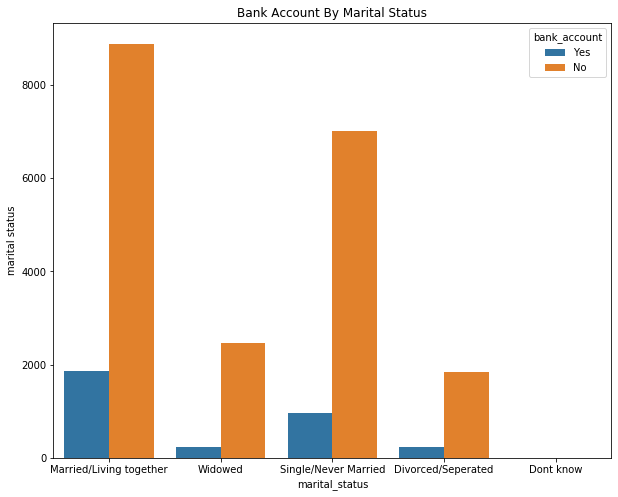

In [90]:
# investigating bank account by marital status
fig, ax = plt.subplots(figsize = (10, 8))
bank_mar = sns.countplot('marital_status', hue = 'bank_account', data = train)
bank_mar.set(title = 'Bank Account By Marital Status', ylabel = 'marital status')

Those that are married or living together with their partners make up the majority of respondents with bank accounts, followed by those who are single or had never been married. They are followed by those who got divorced/separated and those who are widowed.

[Text(0, 0.5, 'bank account'),
 Text(0.5, 1.0, 'Bank Account By Education Level')]

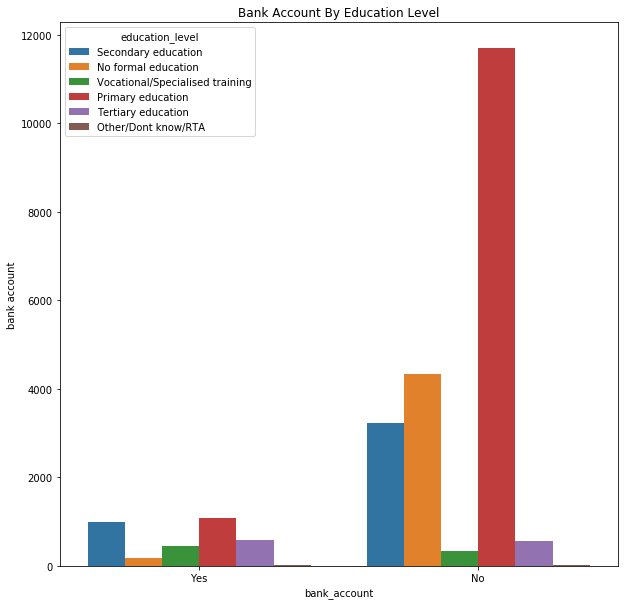

In [95]:
# investigating bank account by education level
fig, ax = plt.subplots(figsize = (10, 10))
bank_edu = sns.countplot('bank_account', hue = 'education_level', data = train)
bank_edu.set(title = 'Bank Account By Education Level', ylabel = 'bank account')

From the diagram, those with primary level of education and those with secondary level of education appear to be neck-to-neck when it comes to having a bank account. Those with no formal education had the lowest number of resspondents with bank accounts, not including the group that selected "Other/Don't Know/RTA" as their answer.

[Text(0, 0.5, 'bank account'), Text(0.5, 1.0, 'Bank Account By Job Type')]

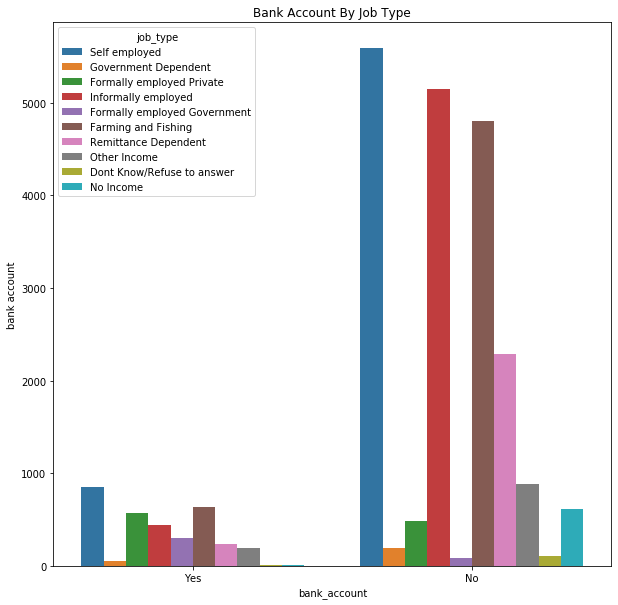

In [96]:
# investigating bank account by job type
fig, ax = plt.subplots(figsize = (10, 10))
bank_job = sns.countplot('bank_account', hue = 'job_type', data = train)
bank_job.set(title = 'Bank Account By Job Type', ylabel = 'bank account')

Of those with bank accounts, majority are self employed followed by those who are in the Farming and Fishing sector. Those who are dependent on the government have the lowest number of respondents with a bank account.

In [61]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

Text(0.5, 1.0, 'Household Sizes across the Years')

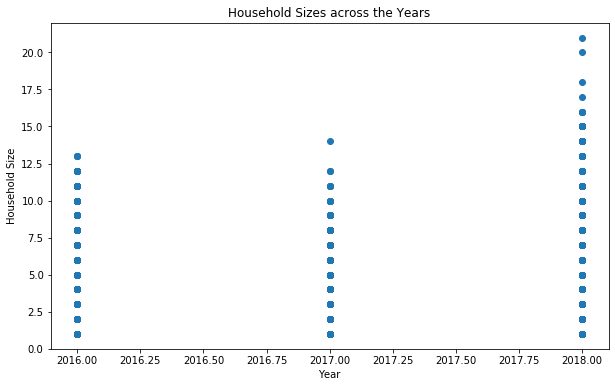

In [111]:
# relationship between year and household size
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(train.year, train.household_size)
plt.xlabel("Year")
plt.ylabel("Household Size")
plt.title("Household Sizes across the Years")

From this we can see that the size of household sizes increased in 2018.

Text(0.5, 1.0, 'Age of Respondent across Household Size')

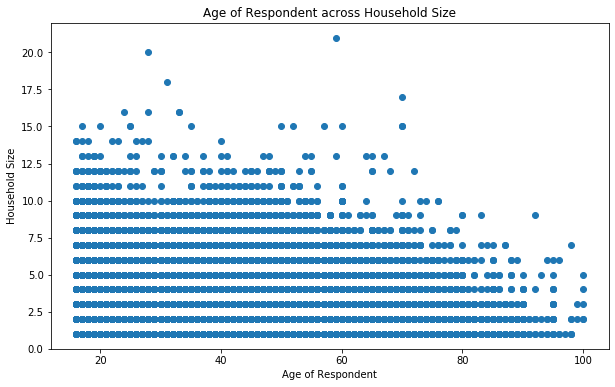

In [113]:
# relationship between household size and age of respondent
fig, ax = plt.subplots(figsize = (10, 6))
plt.scatter(train.age_of_respondent, train.household_size)
plt.ylabel("Household Size")
plt.xlabel("Age of Respondent")
plt.title("Age of Respondent across Household Size")

Text(0.5, 1.0, 'Age of the Respondents across the Years')

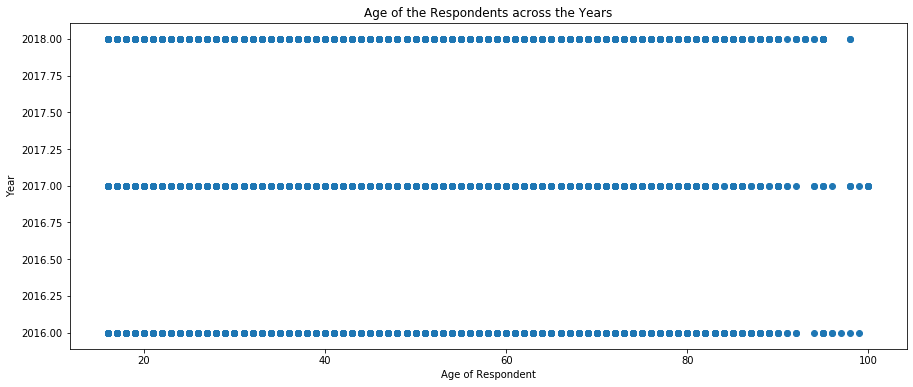

In [119]:
# relationship between age of respondent and year
fig, ax = plt.subplots(figsize = (15, 6))
plt.scatter(train.age_of_respondent, train.year)
plt.ylabel("Year")
plt.xlabel("Age of Respondent")
plt.title("Age of the Respondents across the Years")

The age of respondents appears to be uniform throughout the year with little significant differences.

In [46]:
# investiigating the correlationships between the numerical variables
corr = train.corr()
corr

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


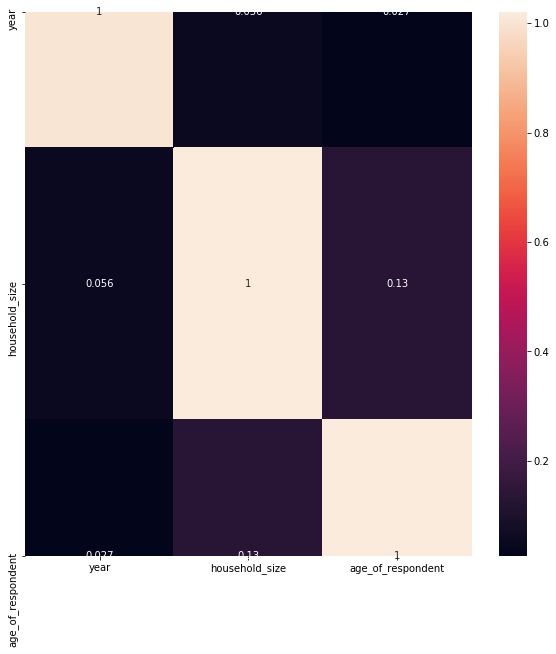

In [48]:
# calculating the Variance Inflation Factor (VIF) score
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heat map to display the results
plt.figure(figsize = (10, 10))
sns.heatmap(vif, annot = True)

These variables do not appear to be highly correlated with one another so there is no need to remove any.

# 4. Hypothesis Testing